该部分的代码来自于http://eneskemalergin.github.io/blog//blog/Fuzzy_Clustering/

# 导入库并设置图片

In [1]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Configure some general styling
sns.set_style("white")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.figsize'] = (8,7)

# 原始数据绘图

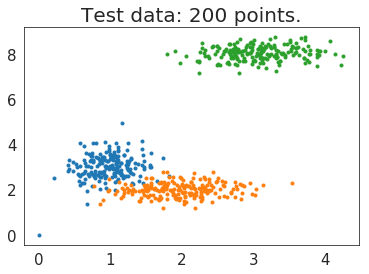

In [2]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


# Define three cluster centers
centers = [[1, 3],
           [2, 2],
           [3, 8]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.3, 0.5],
          [0.5, 0.3],
          [0.5, 0.3]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.')
ax0.set_title('Test data: 200 points.')
plt.show()

# 绘制聚类后的图

## 绘图过程

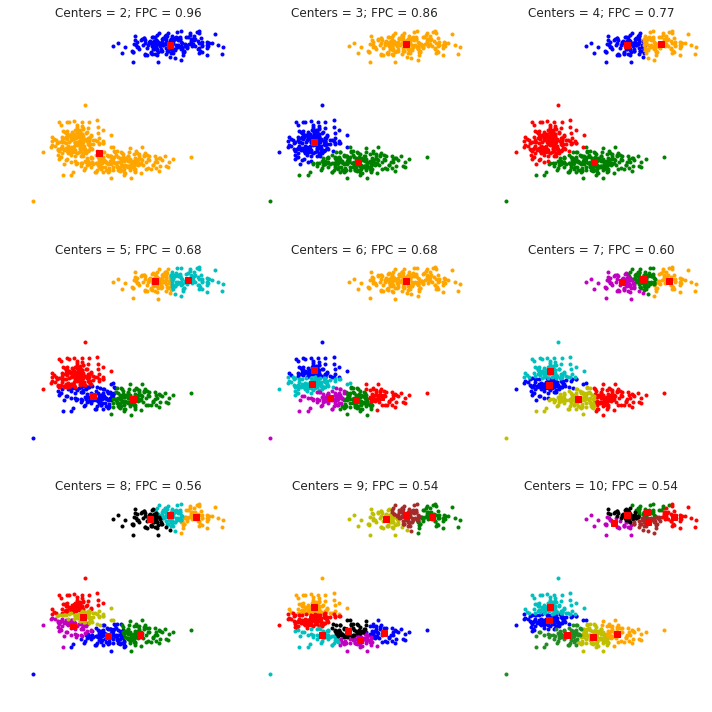

In [3]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
    ax.axis('off')

fig1.tight_layout()

## fuzz.cluster.cmeans参数说明
https://blog.csdn.net/frankiehello/article/details/79581315

输入：

data, 输入数据

ncenters, 中心个数

m, 隶属函数系数

error, 停止条件

maxiter, 迭代次数

输出：

cntr, 聚类的中心

u,最终的隶属度矩阵

u0,初始化的隶属度矩阵

d，每个数据点到各个中心的欧氏距离矩阵

jm,目标函数优化历史

p,迭代次数

fpc，模糊划分系数

注意，这里的输入数据的格式，在上述博客中也有说明，也可以具体参照库的API说明

In [4]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, 2, 2, error=0.005, maxiter=1000, init=None)

print("cntr.shape:%s" % str(cntr.shape))
print("u.shape:%s" % str(u.shape))
print("u0.shape:%s"%str(u0.shape))
print("d.shape:%s" % str(d.shape))
print("jm.shape:%s" % str(jm.shape))

cntr.shape:(2, 2)
u.shape:(2, 601)
u0.shape:(2, 601)
d.shape:(2, 601)
jm.shape:(7,)
